# RFM Analysis Project

## Introduction

Customer segmentation is a fundamental technique in marketing analytics, allowing businesses to classify customers based on their purchasing behavior. One of the most widely used segmentation methods is **RFM Analysis**, which categorizes customers based on **Recency (R), Frequency (F), and Monetary (M) values**.

This project aims to apply **RFM segmentation** to real-world **automobile sales data** to identify customer groups and provide insights for tailored marketing strategies.

## Objectives

1. **Understand the Customer Base**: Analyze purchasing patterns using **Recency, Frequency, and Monetary** metrics.
2. **Segment Customers Effectively**: Group customers into distinct categories based on RFM scores.
3. **Derive Business Insights**: Identify high-value customers, potential churners, and strategic marketing opportunities.
4. **Data-Driven Decision Making**: Use visualization and statistical analysis to support marketing strategies.

## Dataset Overview

- **Source**: The dataset used for this analysis is publicly available on Kaggle: [Auto Sales Data](https://www.kaggle.com/datasets/ddosad/auto-sales-data).
- **Description**: This dataset contains historical automobile sales transactions, including order details, customer information, product categories, and sales amounts.
- **Key Features**:
  - `ORDERDATE`: Date of the transaction.
  - `CUSTOMERNAME`: Name of the customer.
  - `ORDERNUMBER`: Unique transaction identifier.
  - `SALES`: Total amount spent per transaction.
  - `QUANTITYORDERED`: Number of items purchased.
  - `PRODUCTLINE`: Category of the purchased product.
  - `COUNTRY`: Customer location.

## Theoretical Background

This analysis is grounded in the **RFM framework**, which is part of **deterministic segmentation** techniques. According to marketing research:

- **Recency (R)**: Measures how recently a customer has made a purchase. The assumption is that customers who purchased recently are more likely to purchase again.
- **Frequency (F)**: Counts how often a customer makes a purchase within a given period. A high frequency suggests customer loyalty.
- **Monetary (M)**: Represents the total spending of a customer. Higher spending customers are often the most valuable to a business.

## Next Steps

The following sections will cover:

- **Data Exploration**: Understanding the dataset structure and key statistics.
- **Data Cleaning & Transformation**: Preparing data for analysis.
- **RFM Calculation & Segmentation**: Applying the RFM model to segment customers.
- **Visualization & Insights**: Interpreting results with plots and business implications.

By the end of this project, I aim to present a structured analysis that highlights key customer segmentation insights, supporting strategic decision-making in marketing.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Standard Library Imports
import os
import zipfile
import datetime as dt
from warnings import filterwarnings

# Data Processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Suppress warnings for cleaner output
filterwarnings('ignore')

In [ ]:
zip_path = "/content/drive/My Drive/Colab Notebooks/RFM_AS/automobile_sales_data.zip"
extract_path = "/content/dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Data Exploration

Before conducting any analysis, we first explore the dataset to understand its structure.
This includes checking the data types, identifying missing values, and analyzing basic
statistical distributions. This step ensures we have a clear understanding of the data
before proceeding with transformation and modeling.


In [ ]:
csv_path = os.path.join(extract_path, "Auto Sales data.csv")
df_source = pd.read_csv(csv_path)
df_source.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


### Observations
- The dataset contains multiple numeric and categorical variables.
- We need to verify whether any columns have missing values or require data type conversion.
- The distribution of variables will help in feature selection for RFM segmentation.


In [ ]:
# General statistics of numerical columns
df_source.describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99]).T  # Transpose for better readability

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10104.0000,10131.00,10181.000,10264.00,10334.500,10386.00,10405.700,10420.5400,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,20.0000,22.00,27.000,35.00,43.000,48.00,49.000,57.0800,97.00
PRICEEACH,2747.0,101.098952,42.042549,26.88,33.0820,51.75,68.745,95.55,127.100,159.65,178.829,223.7070,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,1.0000,1.00,3.000,6.00,9.000,13.00,14.000,17.0000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,878.4354,1564.11,2204.350,3184.80,4503.095,6078.38,7083.811,9165.0256,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,226.9200,651.60,1077.000,1761.00,2436.500,2855.40,3043.500,3310.7000,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,35.0000,54.00,68.000,99.00,124.000,157.00,170.000,207.0000,214.00


In [ ]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

## Data Cleaning & Transformation

To prepare the dataset for analysis, we:
- Remove unnecessary columns that do not contribute to customer segmentation.
- Convert date fields into a proper datetime format.
- Handle missing values (in this case there are no missing values).


In [ ]:
df_source.drop(columns=['ORDERLINENUMBER', 'STATUS', 'ADDRESSLINE1', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'PHONE'], inplace=True)
df_source.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,24/02/2018,828,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,10121,34,81.35,2765.90,07/05/2018,757,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,10134,41,94.74,3884.34,01/07/2018,703,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,10145,45,83.26,3746.70,25/08/2018,649,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,10168,36,96.66,3479.76,28/10/2018,586,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


In [ ]:
# Convert ORDERDATE column to datetime format
df_source = df_source.assign(ORDERDATE=pd.to_datetime(df_source['ORDERDATE']))

# Display dataset information
print(df_source.info())

# Retrieve the earliest and latest transaction dates
latest_date = df_source['ORDERDATE'].max()
earliest_date = df_source['ORDERDATE'].min()

print("Latest transaction date:", latest_date)
print("Earliest transaction date:", earliest_date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   SALES                 2747 non-null   float64       
 4   ORDERDATE             2747 non-null   datetime64[ns]
 5   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 6   PRODUCTLINE           2747 non-null   object        
 7   MSRP                  2747 non-null   int64         
 8   PRODUCTCODE           2747 non-null   object        
 9   CUSTOMERNAME          2747 non-null   object        
 10  CITY                  2747 non-null   object        
 11  COUNTRY               2747 non-null   object        
 12  DEALSIZE              2747 non-null   object        
dtypes: datetime64[ns](

### Data Cleaning Steps Completed
- Dropped non-essential columns such as `ORDERLINENUMBER`, `STATUS`, `POSTALCODE`, etc.
- Ensured `ORDERDATE` is in datetime format.


In [ ]:
# Convert column to datetime format
def to_datetime(df, column):
    df[column] = pd.to_datetime(df[column])

# Calculate monthly sales
def monthly_sales(df):
    return df.resample('M', on='ORDERDATE')['ORDERNUMBER'].sum()

# Calculate daily sales
def daily_sales(df):
    df['ORDERDATE'] = df['ORDERDATE'].dt.date
    return df.groupby('ORDERDATE')['ORDERNUMBER'].sum()

to_datetime(df_source, 'ORDERDATE')
df_monthly = monthly_sales(df_source.copy())
df = daily_sales(df_source.copy())

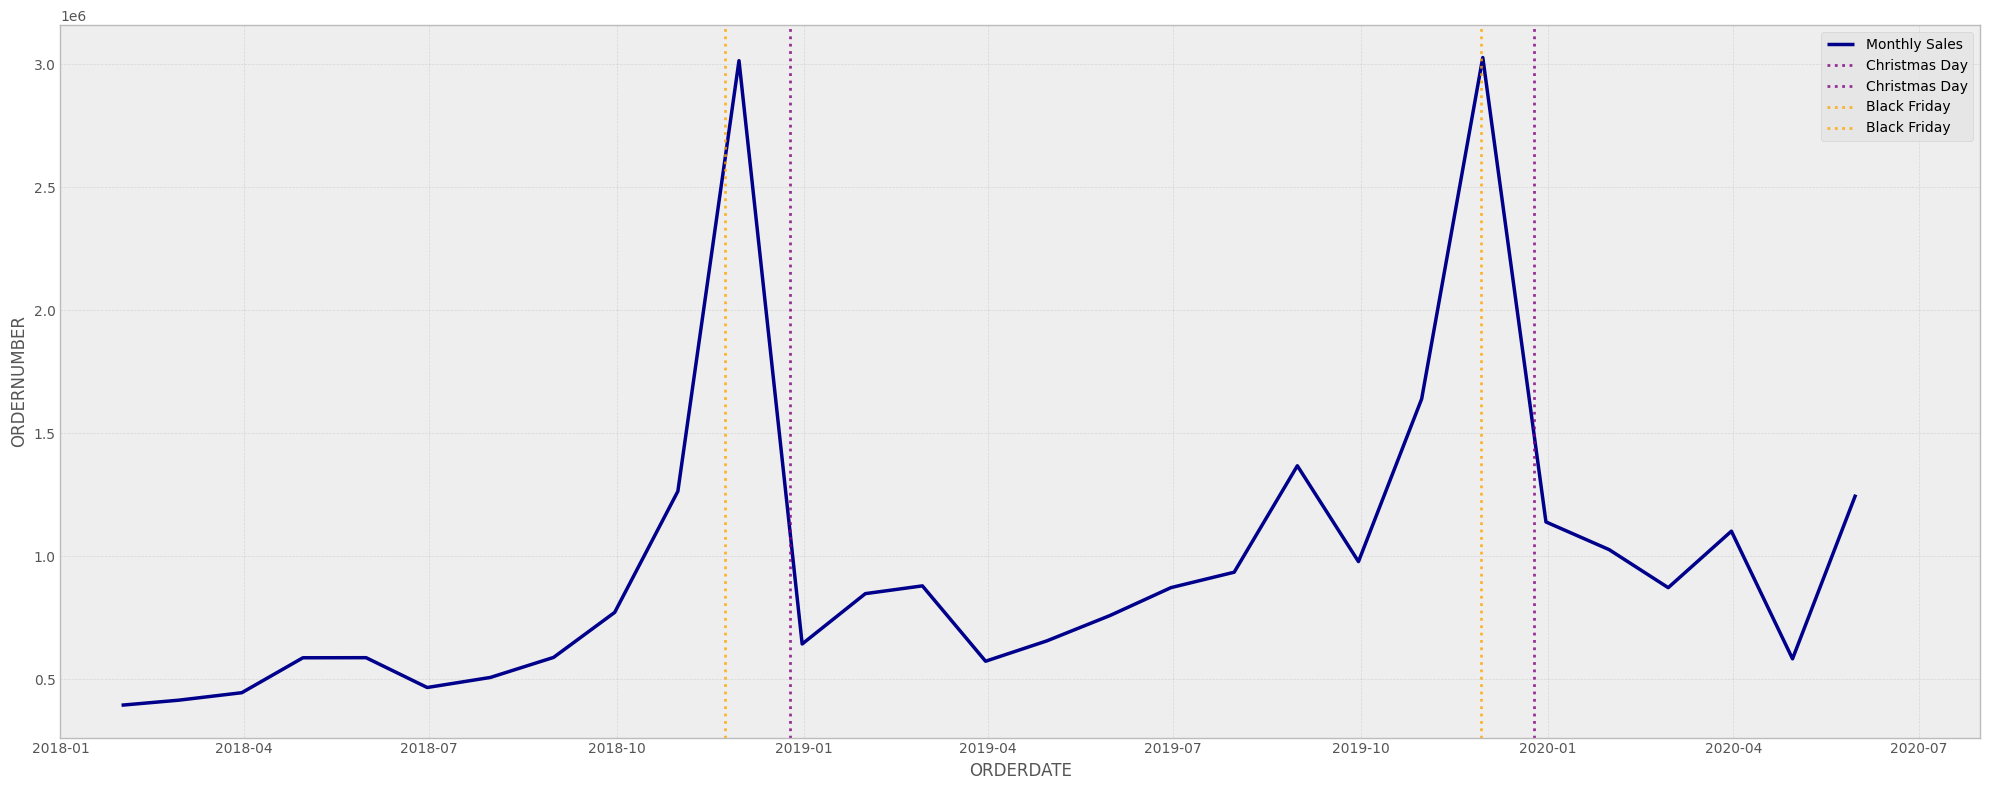

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.style.use('ggplot')

# Monthly sales
sns.lineplot(
    data=df_monthly.reset_index(),
    x='ORDERDATE',
    y='ORDERNUMBER',
    ax=ax,
    color='darkblue',
    label='Monthly Sales',
    linewidth=2.5
)

# Define key event dates
event_dates = {
    "Christmas Day": ['2018-12-25', '2019-12-25'],
    "Black Friday": ['2018-11-23', '2019-11-29']
}

event_colors = {"Christmas Day": 'purple', "Black Friday": 'orange'}

# Add vertical lines for event dates
for event, dates in event_dates.items():
    for date in pd.to_datetime(dates):
        ax.axvline(x=date, color=event_colors[event], linestyle='dotted', alpha=0.8, label=event)

# Formatting the plot
ax.set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2020-07-31'))
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend()
plt.tight_layout()
plt.show()


From this graph, we observe sales spikes between October and January in both years, suggesting that the majority of purchases occur around the Christmas holiday season. However, in 2019, the peak also coincides with Black Friday, indicating an additional sales boost during that period.



Number of unique countries: 19


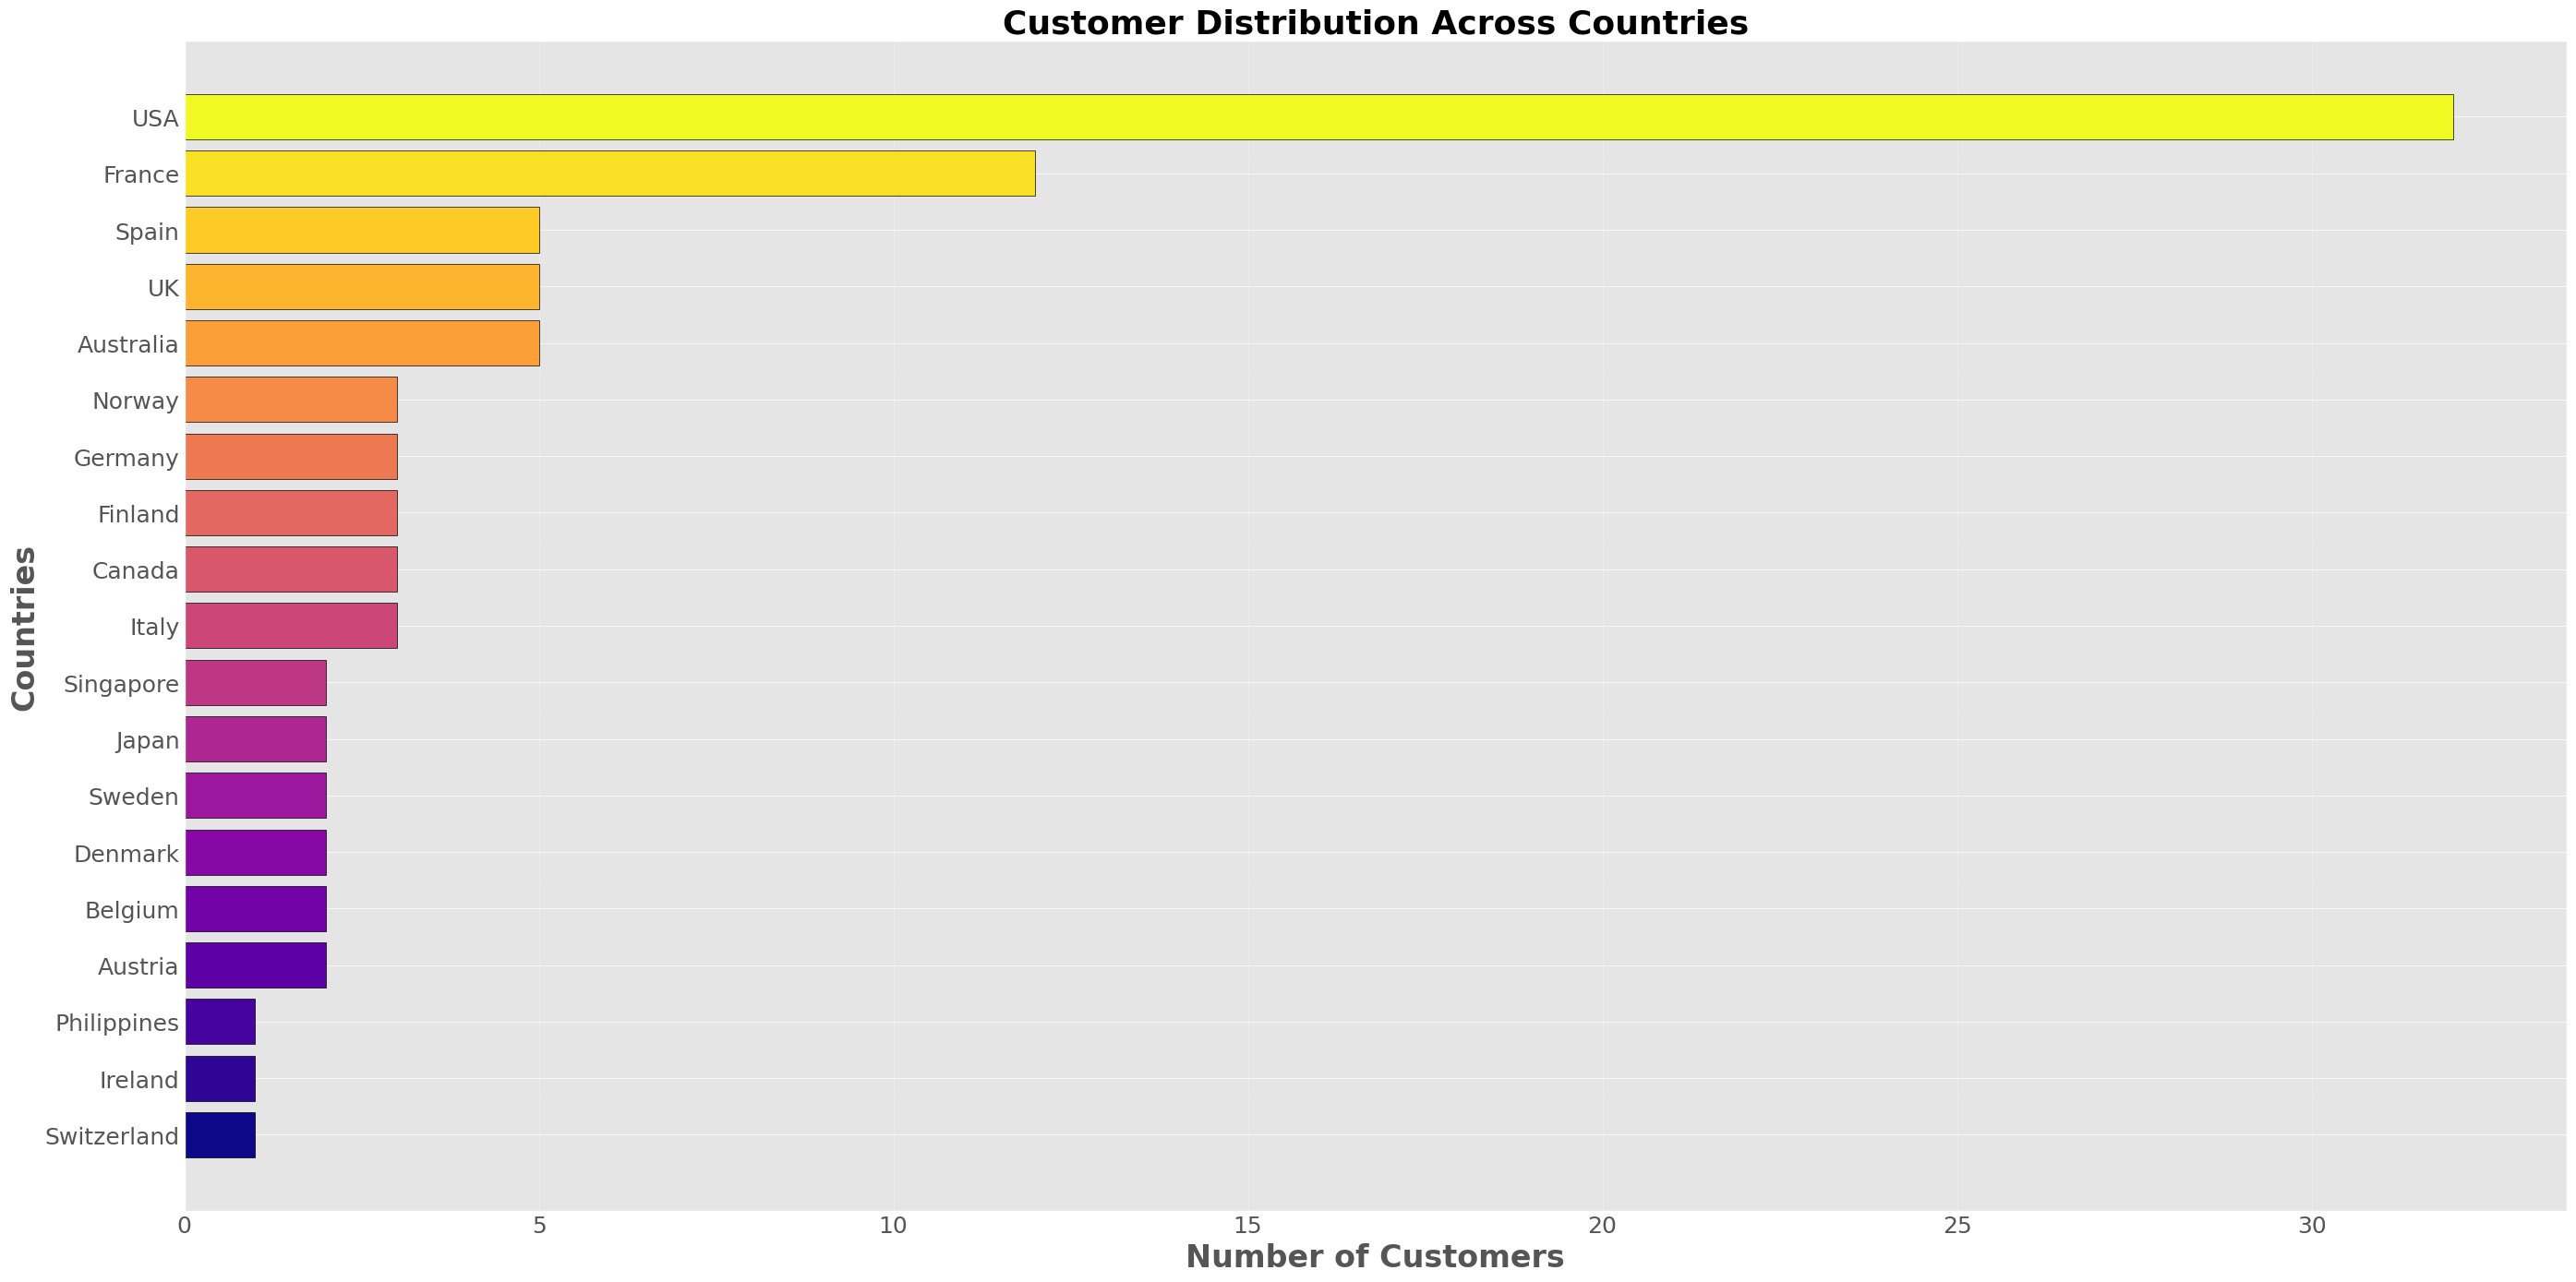

In [ ]:
# Count the number of unique countries
num_countries = df_source['COUNTRY'].nunique()
print(f"Number of unique countries: {num_countries}")

# Define colors
color_palette = plt.cm.plasma(np.linspace(0, 1, len(df_source['COUNTRY'].unique())))

# Compute customer counts per country and sort
country_customer_counts = df_source.groupby('COUNTRY')['CUSTOMERNAME'].nunique().sort_values(ascending=True)

# Set up figure and axes using subplots
fig, ax = plt.subplots(figsize=(28, 14))
plt.style.use('bmh')

# Plot the data
ax.barh(country_customer_counts.index, country_customer_counts.values, color=color_palette, edgecolor='black')

# Labels and titles
ax.set_title('Customer Distribution Across Countries', fontsize=26, fontweight='bold')
ax.set_xlabel('Number of Customers', fontsize=24, fontweight='bold')
ax.set_ylabel('Countries', fontsize=24, fontweight='bold')

# Adjust ticks for better readability
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

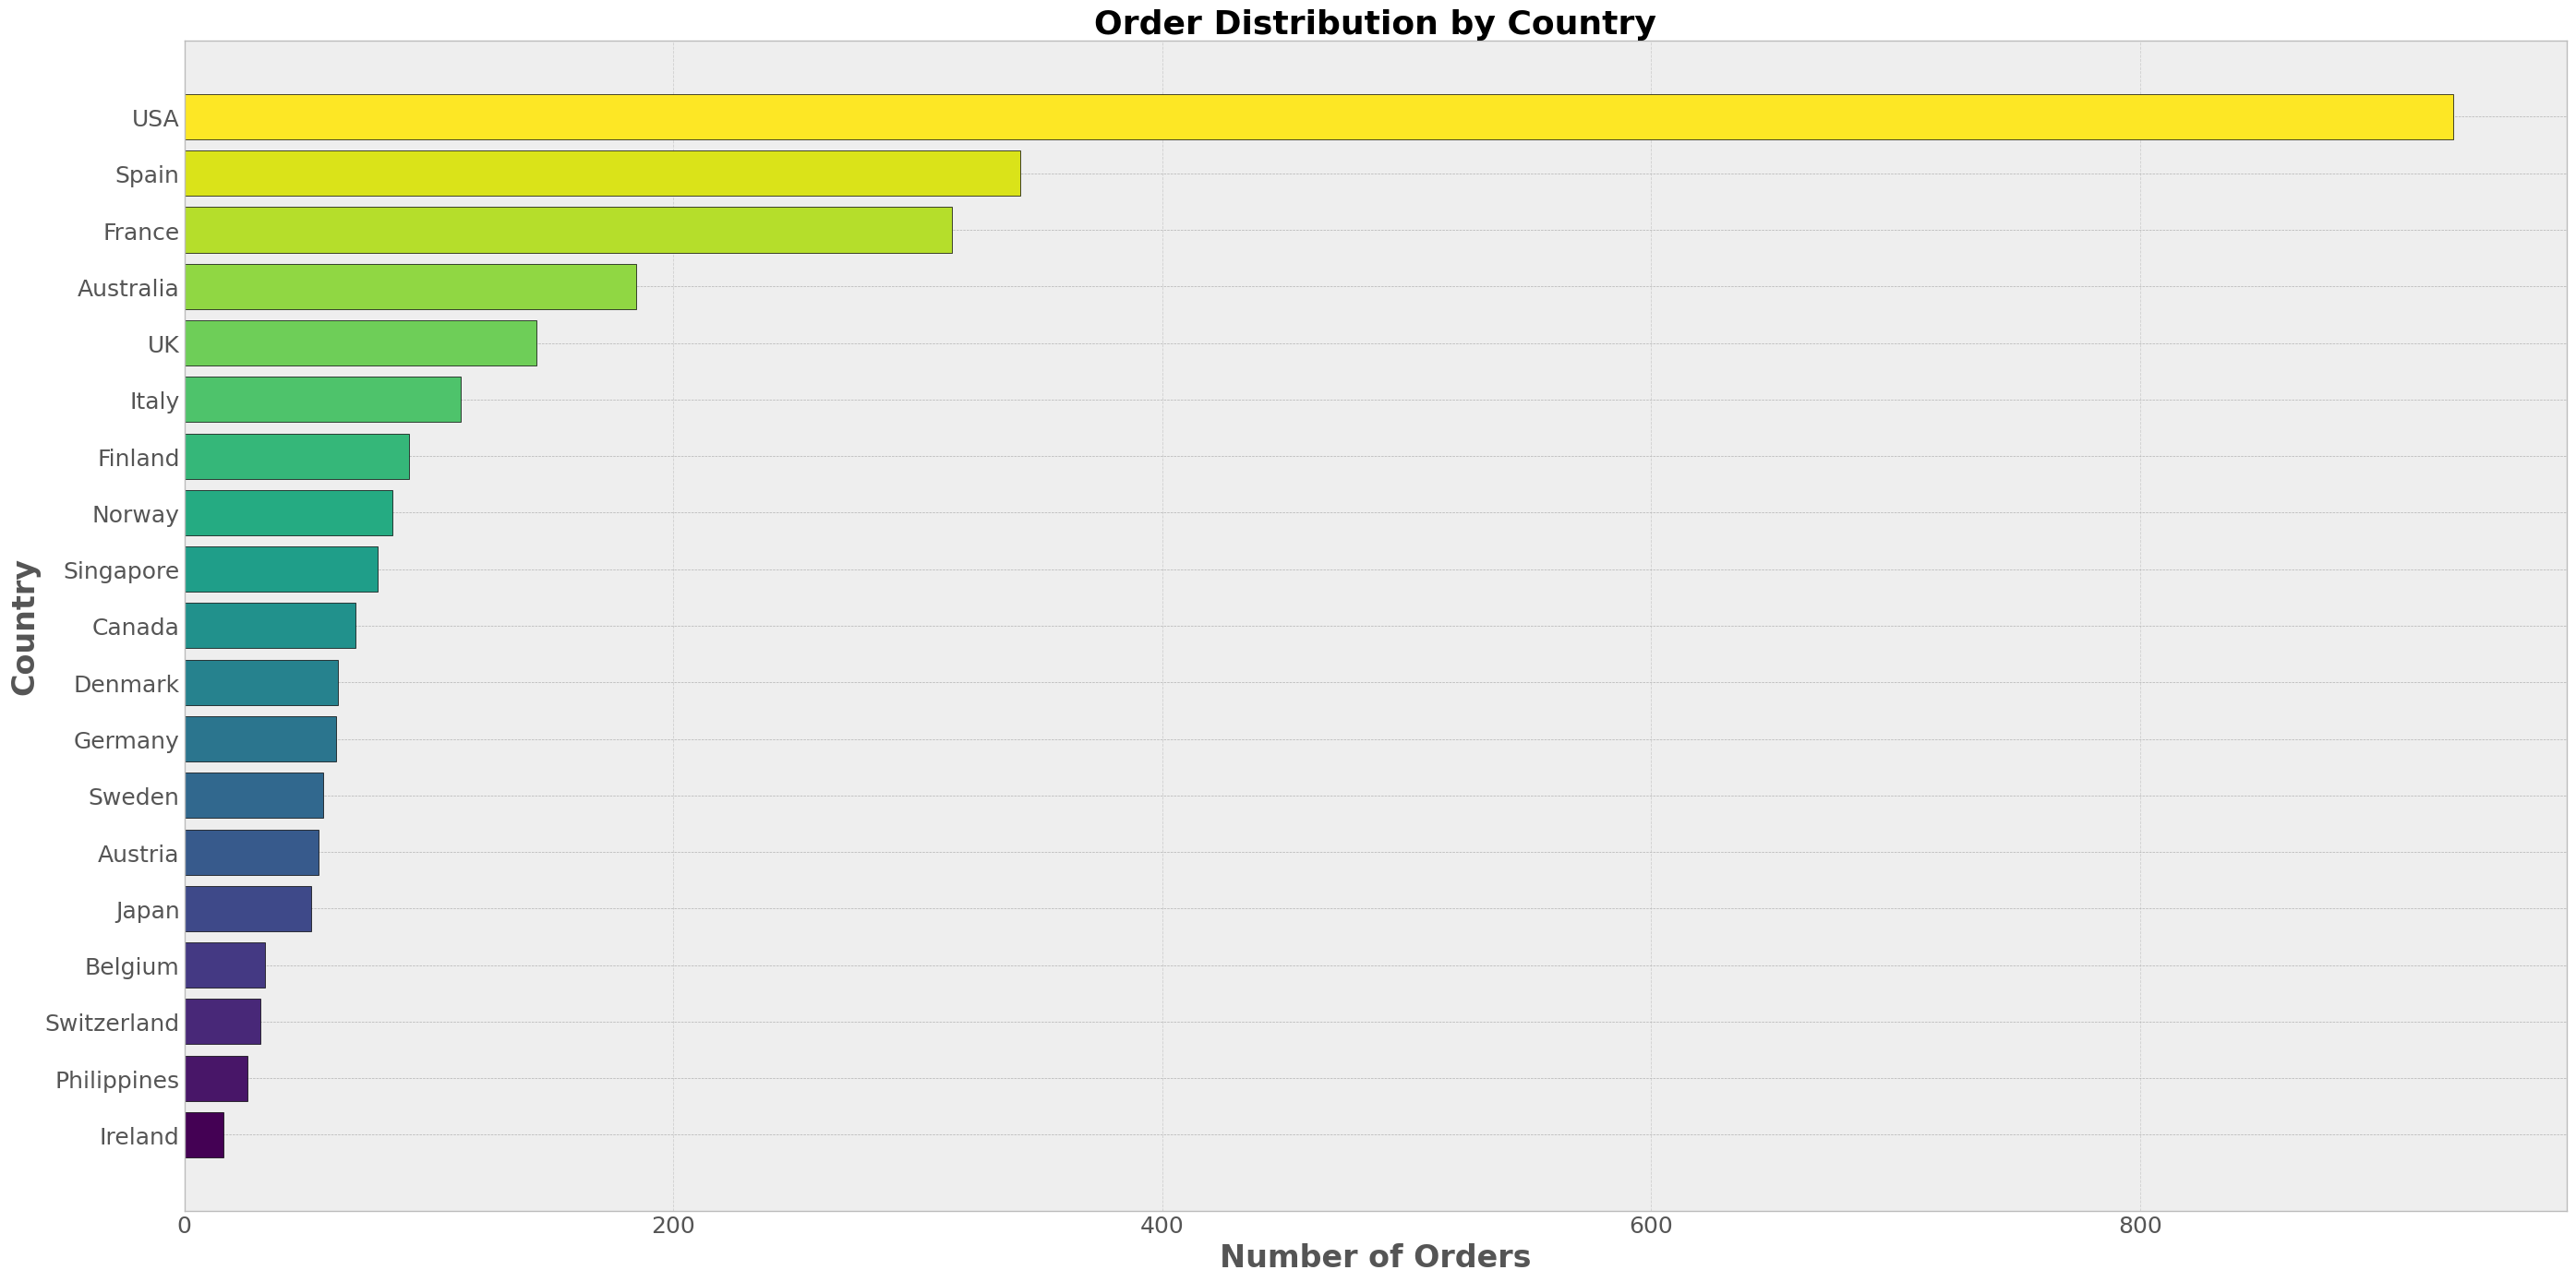

In [ ]:
# Count the number of orders per country
order_counts_by_country = df_source['COUNTRY'].value_counts().sort_values(ascending=True)

# Define colormap
color_scheme = plt.cm.viridis(np.linspace(0, 1, len(order_counts_by_country)))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(28, 14))
plt.style.use('bmh')

# Plot the data
ax.barh(order_counts_by_country.index, order_counts_by_country.values, color=color_scheme, edgecolor='black')

# Set title and labels
ax.set_title('Order Distribution by Country', fontsize=26, fontweight='bold')
ax.set_xlabel('Number of Orders', fontsize=24, fontweight='bold')
ax.set_ylabel('Country', fontsize=24, fontweight='bold')

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.grid(axis='x', linestyle='dashed', linewidth=0.6, alpha=0.5)

plt.tight_layout()
plt.show()

## Additional Insights

In [ ]:
# Count product frequencies
product_counts = df_source['PRODUCTCODE'].value_counts()

# Get the top 3 most and least frequently sold products
top_products = product_counts.nlargest(3)
bottom_products = product_counts.nsmallest(3)

# Display the most frequently sold products
print("\nMost Sold Products:")
print(top_products.to_string(), "\n")

# Display the least frequently sold products
print("Least Sold Products:")
print(bottom_products.to_string())


Most Sold Products:
PRODUCTCODE
S18_3232    51
S32_2509    28
S50_1392    28 

Least Sold Products:
PRODUCTCODE
S18_2248    21
S18_1749    21
S18_4409    21


In [ ]:
# Count unique customers and unique products
num_customers = df_source['CUSTOMERNAME'].nunique()
num_products = df_source['PRODUCTCODE'].nunique()

print(f"Total Unique Customers: {num_customers}")
print(f"Total Unique Products: {num_products}")

Total Unique Customers: 89
Total Unique Products: 109


In [ ]:
# Compute the average number of unique products purchased per customer
avg_products_per_customer = df_source.groupby('CUSTOMERNAME')['PRODUCTCODE'].nunique().mean()
print(f"Average Unique Products Purchased Per Customer: {avg_products_per_customer:.2f}")

Average Unique Products Purchased Per Customer: 25.81


In [ ]:
# Get the top 10 most sold products per product line
top_products = df_source.groupby('PRODUCTLINE')['PRODUCTCODE'].value_counts().nlargest(10)

print("\nTop 10 Most Sold Products:\n")
print(top_products.to_string())


Top 10 Most Sold Products:

PRODUCTLINE       PRODUCTCODE
Classic Cars      S18_3232       51
                  S24_1444       28
                  S24_2840       28
Trucks and Buses  S32_2509       28
                  S50_1392       28
Classic Cars      S10_4962       27
                  S18_1129       27
                  S18_1984       27
                  S18_2238       27
                  S700_2824      27


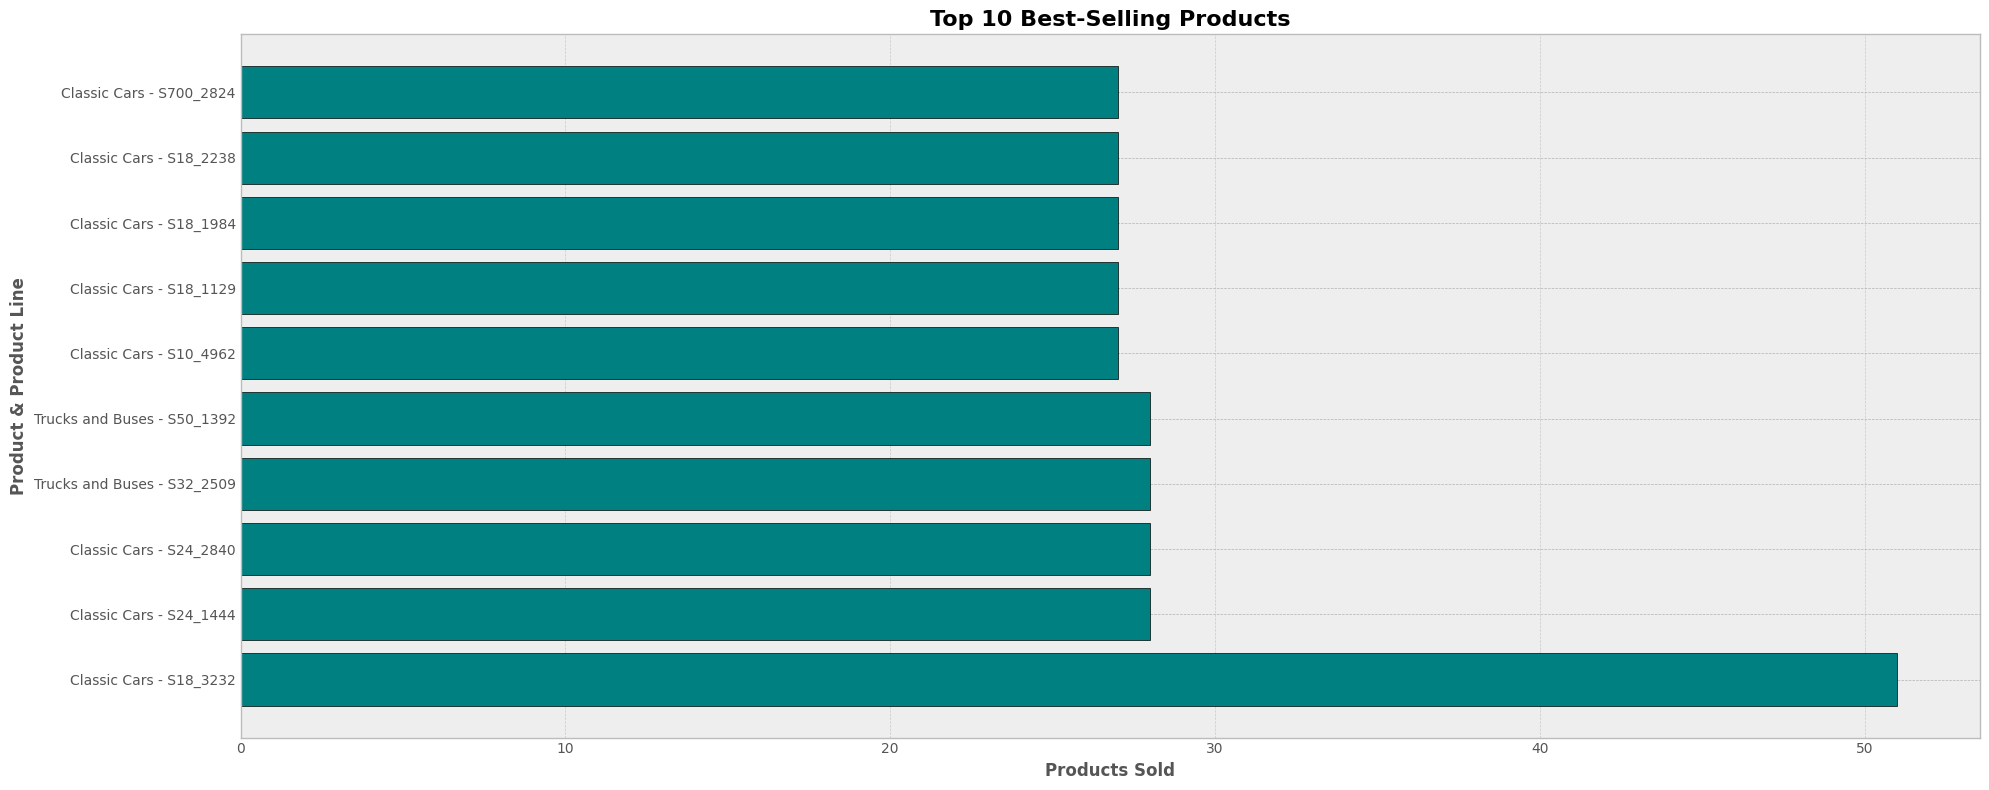

In [ ]:
top_products = top_products.reset_index()

# Rename columns for clarity
top_products.columns = ['Product Line', 'Product Code', 'Count']

# Create labels by combining product line and product code
top_products['Label'] = top_products['Product Line'] + " - " + top_products['Product Code'].astype(str)

# Set up figure and style
fig, ax = plt.subplots(figsize=(20, 8))
plt.style.use('bmh')

# Plot data
ax.barh(top_products['Label'], top_products['Count'], color='teal', edgecolor='black')

# Set labels and title
ax.set_title('Top 10 Best-Selling Products', fontsize=16, fontweight='bold')
ax.set_xlabel('Products Sold', fontsize=12, fontweight='bold')
ax.set_ylabel('Product & Product Line', fontsize=12, fontweight='bold')

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.grid(axis='x', linestyle='dashed', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()


From this graph, it is clear that Classic Cars is the most popular product line among customers, as the majority of the top 10 best-selling items belong to this category. However, Trucks and Buses also appear in the ranking, indicating that they are significant contributors to sales.

# RFM

In [ ]:
# Group dataset
transaction_counts = df_source.groupby('CUSTOMERNAME')['ORDERNUMBER'].nunique().reset_index(name='ORDERNUMBER')
total_revenue = df_source.groupby('CUSTOMERNAME')['SALES'].sum().reset_index(name='SALES')
total_quantity = df_source.groupby('CUSTOMERNAME')['QUANTITYORDERED'].sum().reset_index(name='QUANTITYORDERED')

# Merge datasets
merged_df = (
    transaction_counts
    .merge(total_revenue, on='CUSTOMERNAME')
    .merge(total_quantity, on='CUSTOMERNAME')
)
merged_df

,CUSTOMERNAME,ORDERNUMBER,SALES,QUANTITYORDERED
0,"AV Stores, Co.",3,157807.81,1778
1,Alpha Cognac,3,70488.44,687
2,Amica Models & Co.,2,94117.26,843
3,"Anna's Decorations, Ltd",4,153996.13,1469
4,Atelier graphique,3,24179.96,270
...,...,...,...,...
84,"Vida Sport, Ltd",2,117713.56,1078
85,Vitachrome Inc.,3,88041.26,787
86,"Volvo Model Replicas, Co",4,75754.88,647
87,West Coast Collectables Co.,2,46084.64,511


## RFM Calculation & Segmentation

RFM (Recency, Frequency, Monetary) analysis helps categorize customers based on their
purchasing behavior:
- **Recency (R)**: How recently a customer made a purchase.
- **Frequency (F)**: How often they make purchases.
- **Monetary (M)**: How much they spend.

We will compute these metrics and assign RFM scores to segment our customer base.


In [ ]:
# Extract customer names from the merged dataset
df_customers = merged_df['CUSTOMERNAME']

# Function to calculate Recency (days since last purchase)
def calculate_recency(data):
    reference_date = pd.to_datetime('31/05/2020')  # Fixed date as the latest transaction reference
    last_purchase = df_source.groupby('CUSTOMERNAME')['ORDERDATE'].max()  # Find last purchase per customer
    recency_days = last_purchase.apply(lambda x: (reference_date - x).days)  # Calculate days since last purchase
    recency_days.name = 'Recency'
    return recency_days.reset_index()

# Generate Recency DataFrame
df_recency = calculate_recency(df)

# Calculate total spending (Monetary) for each customer
df_monetary = df_source.groupby('CUSTOMERNAME').agg(Monetary=('SALES', 'sum')).reset_index()

# Determine purchase frequency (number of unique transactions per customer)
df_frequency = df_source.groupby('CUSTOMERNAME').agg(Frequency=('SALES', 'nunique')).reset_index()

# Merge all components (Recency, Monetary, Frequency) to create the final RFM dataset
df_rfm = pd.merge(df_customers, df_recency, on='CUSTOMERNAME', how='left')
df_rfm = pd.merge(df_rfm, df_monetary, on='CUSTOMERNAME', how='left')
df_rfm = pd.merge(df_rfm, df_frequency, on='CUSTOMERNAME', how='left')

df_rfm

,CUSTOMERNAME,Recency,Monetary,Frequency
0,"AV Stores, Co.",196,157807.81,51
1,Alpha Cognac,64,70488.44,20
2,Amica Models & Co.,265,94117.26,26
3,"Anna's Decorations, Ltd",83,153996.13,46
4,Atelier graphique,188,24179.96,7
...,...,...,...,...
84,"Vida Sport, Ltd",275,117713.56,31
85,Vitachrome Inc.,208,88041.26,25
86,"Volvo Model Replicas, Co",194,75754.88,19
87,West Coast Collectables Co.,488,46084.64,13


In [ ]:
# Display summary statistics for RFM variables
rfm_stats = df_rfm[['Recency', 'Frequency', 'Monetary']].describe(
    percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]
).T

# Make a copy of the original RFM dataset to clean it
df_rfm_filtered = df_rfm.copy()

# Apply filtering conditions
df_rfm_filtered = df_rfm_filtered.query("1 < Frequency <= 46")
df_rfm_filtered = df_rfm_filtered[df_rfm_filtered['Monetary'] <= 154758]  # Monetary value threshold

# Compute correlation matrix for Recency, Frequency, and Monetary variables
rfm_correlation = df_rfm_filtered[['Recency', 'Frequency', 'Monetary']].corr()
rfm_correlation


,Recency,Frequency,Monetary
Recency,1.000000,-0.380097,-0.376539
Frequency,-0.380097,1.000000,0.963956
Monetary,-0.376539,0.963956,1.000000


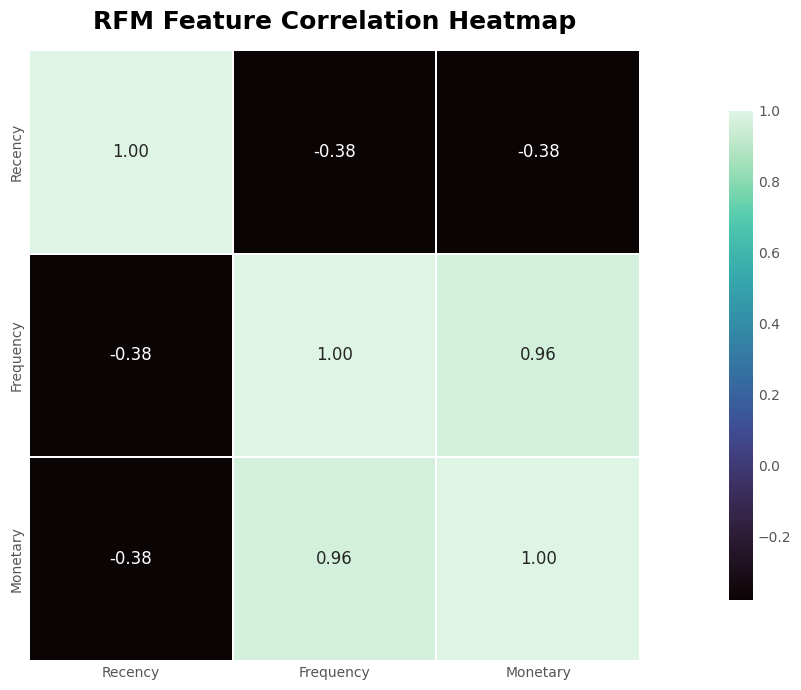

In [ ]:
fig, ax = plt.subplots(figsize=(18, 7))
plt.style.use('bmh')

# Create the heatmap
sns.heatmap(
    rfm_correlation,
    annot=True,
    cmap="mako",
    fmt=".2f",
    annot_kws={"size": 12},
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.3,
    ax=ax
)

ax.set_title('RFM Feature Correlation Heatmap', fontsize=18, fontweight='bold', pad=15)

plt.tight_layout()

plt.show()


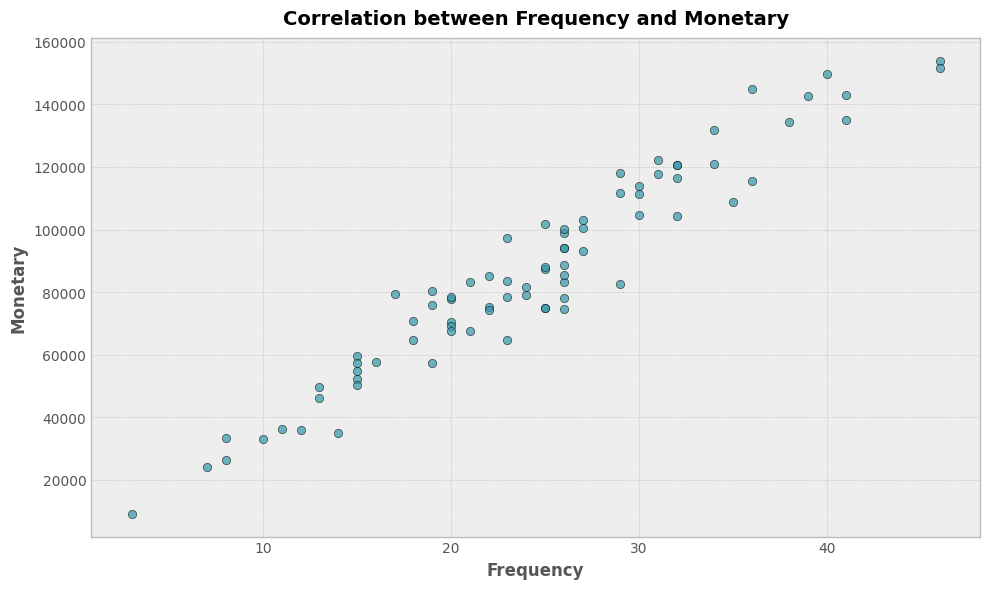

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('bmh')

sns.scatterplot(
    x='Frequency',
    y='Monetary',
    data=df_rfm_filtered,
    color=sns.color_palette("mako", as_cmap=True)(0.6),
    alpha=0.7,
    edgecolor="black"
)

# Set axis labels and title
ax.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax.set_ylabel('Monetary', fontsize=12, fontweight='bold')
ax.set_title('Correlation between Frequency and Monetary', fontsize=14, fontweight='bold', pad=10)

# Improve grid visibility
ax.grid(True, linestyle='dashed', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

## Score distribution

In [ ]:
# Assign ranking based on Recency, Frequency, and Monetary values
df_rfm_filtered = df_rfm_filtered.assign(
    R_rank=df_rfm_filtered['Recency'].rank(ascending=False),
    F_rank=df_rfm_filtered['Frequency'].rank(ascending=True),
    M_rank=df_rfm_filtered['Monetary'].rank(ascending=True)
)

# Normalize ranking scores on a scale of 0 to 100
df_rfm_filtered = df_rfm_filtered.assign(
    R_rank_norm=(df_rfm_filtered['R_rank'] / df_rfm_filtered['R_rank'].max()) * 100,
    F_rank_norm=(df_rfm_filtered['F_rank'] / df_rfm_filtered['F_rank'].max()) * 100,
    M_rank_norm=(df_rfm_filtered['F_rank'] / df_rfm_filtered['M_rank'].max()) * 100
)

# Remove temporary ranking columns to keep the dataset clean
df_rfm_filtered.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

df_rfm_filtered.head()

,CUSTOMERNAME,Recency,Monetary,Frequency,R_rank_norm,F_rank_norm,M_rank_norm
1,Alpha Cognac,64,70488.44,20,78.980892,31.847134,31.645570
2,Amica Models & Co.,265,94117.26,26,20.382166,61.146497,60.759494
3,"Anna's Decorations, Ltd",83,153996.13,46,75.159236,100.000000,99.367089
4,Atelier graphique,188,24179.96,7,52.229299,2.547771,2.531646
5,"Australian Collectables, Ltd",22,64591.46,23,94.267516,43.949045,43.670886


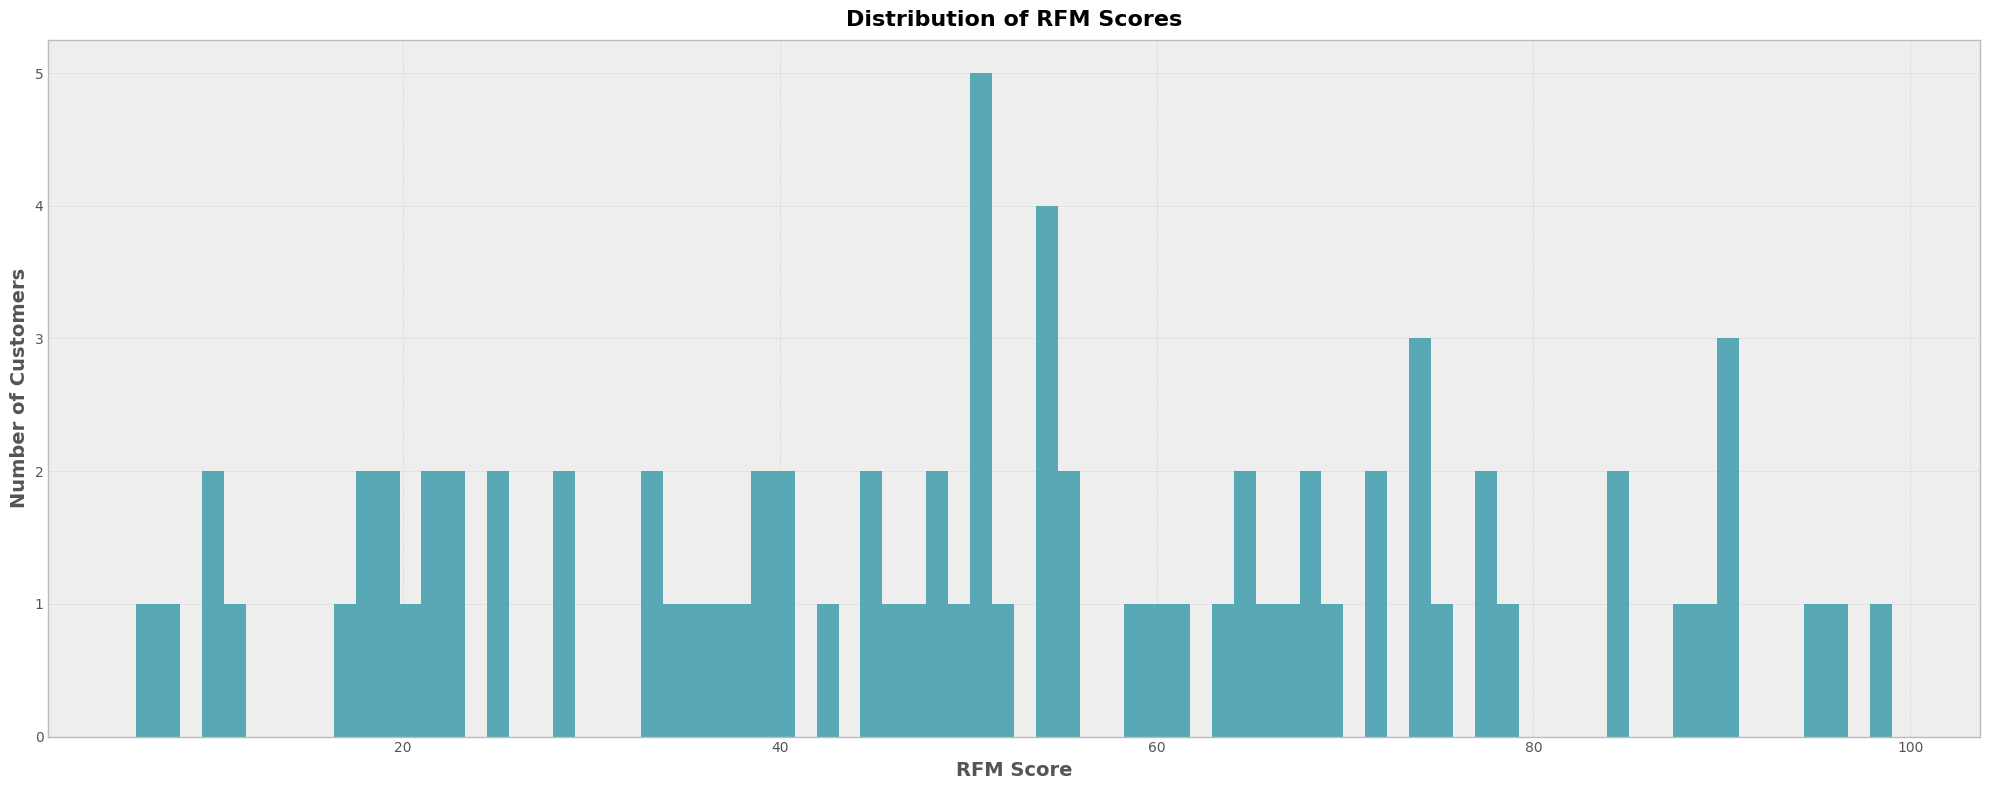

In [ ]:
# Define weight constants for RFM score calculation
WEIGHT_RECENCY = 0.4
WEIGHT_FREQUENCY = 0.3
WEIGHT_MONETARY = 0.3

# Compute RFM Score using weighted ranking
df_rfm_filtered['RFM_Score'] = (
    WEIGHT_RECENCY * df_rfm_filtered['R_rank_norm'] +
    WEIGHT_FREQUENCY * df_rfm_filtered['F_rank_norm'] +
    WEIGHT_MONETARY * df_rfm_filtered['M_rank_norm']
)

# Display statistical summary of RFM Score
rfm_score_stats = df_rfm_filtered[['RFM_Score']].describe(
    percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]
).T

# Plot the distribution of RFM Score
fig, ax = plt.subplots(figsize=(20, 8))
plt.style.use('bmh')

sns.histplot(
    df_rfm_filtered,
    x='RFM_Score',
    bins=80,  # Balanced number of bins for smooth distribution
    color=sns.color_palette("mako", as_cmap=True)(0.6),
    edgecolor=None,
    alpha=0.8
)

# Labels and title formatting
ax.set_xlabel('RFM Score', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=14, fontweight='bold')
ax.set_title('Distribution of RFM Scores', fontsize=16, fontweight='bold', pad=10)

# Subtle grid for better readability
ax.grid(True, linestyle='dashed', linewidth=0.4, alpha=0.5)

plt.tight_layout()
plt.show()

### Evaluation of the costumer

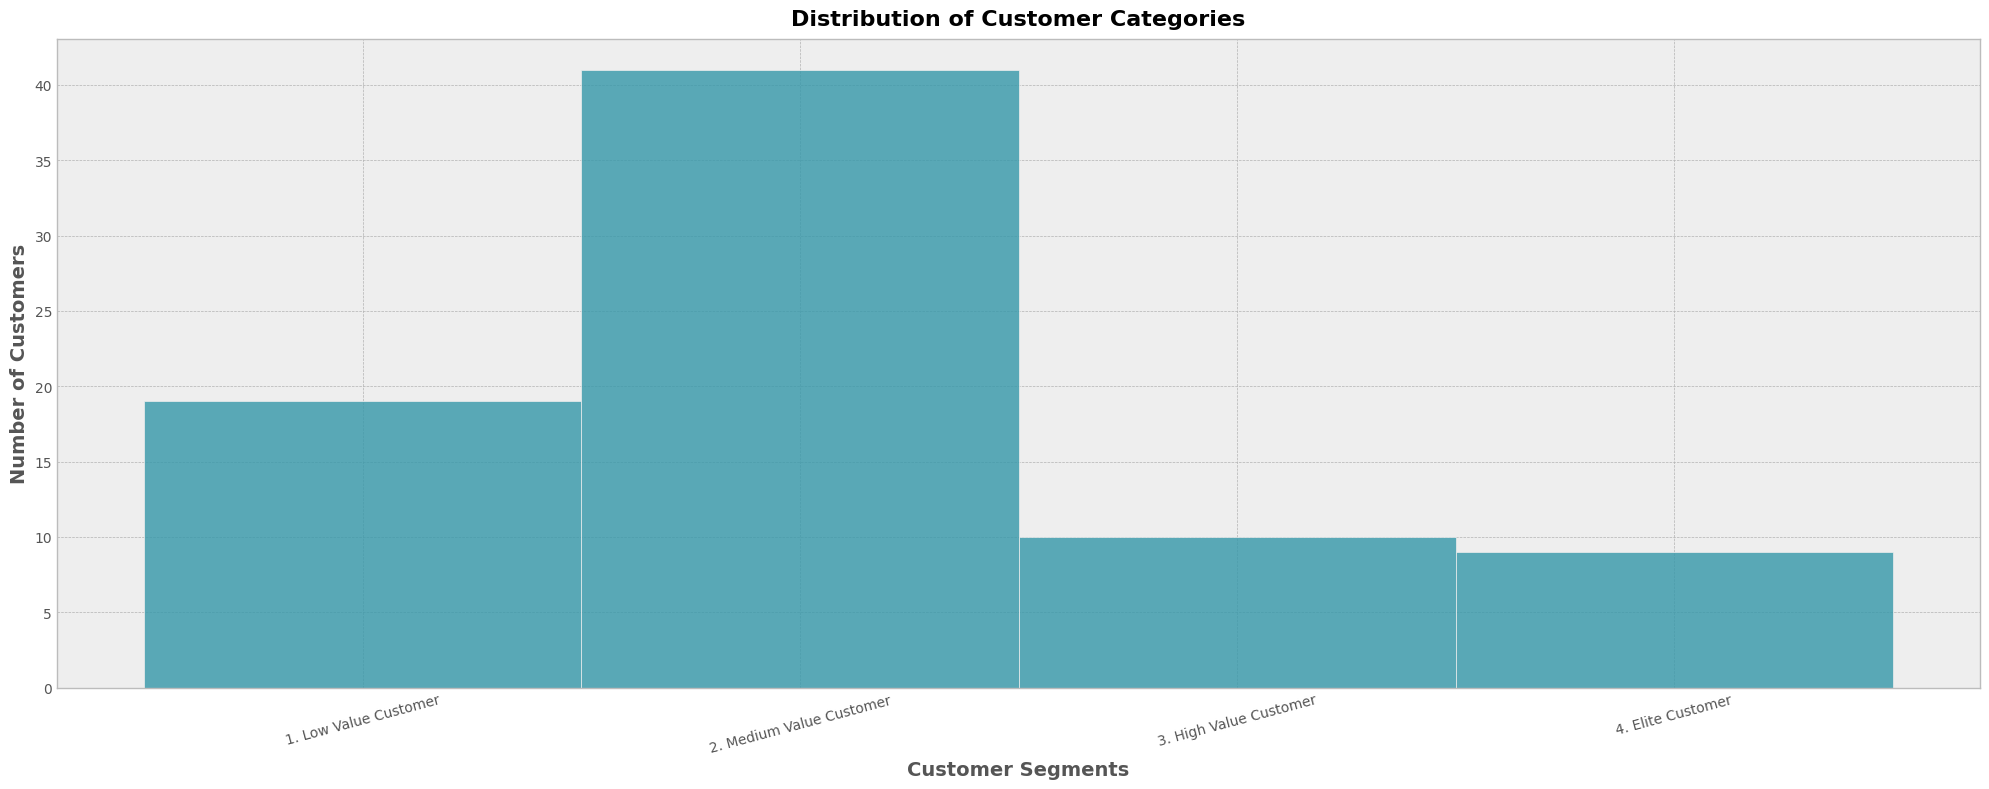

In [ ]:
# Assign customer segments based on RFM Score thresholds
df_rfm_filtered["RFM_Segment"] = np.select(
    [
        df_rfm_filtered['RFM_Score'] > 85,
        df_rfm_filtered['RFM_Score'] > 70,
        df_rfm_filtered['RFM_Score'] > 30
    ],
    [
        "4. Elite Customer",
        "3. High Value Customer",
        "2. Medium Value Customer"
    ],
    default="1. Low Value Customer"  # Default category for scores <= 30
)

# Sort dataset by customer segment
df_rfm_filtered = df_rfm_filtered.sort_values(by='RFM_Segment')

# Set up figure size and style
fig, ax = plt.subplots(figsize=(20, 8))
plt.style.use('bmh')

# Plot customer segment distribution
sns.histplot(
    data=df_rfm_filtered,
    x='RFM_Segment',
    color=sns.color_palette("mako", as_cmap=True)(0.6),
    alpha=0.8
)

# Set axis labels and title
ax.set_xlabel('Customer Segments', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Customer Categories', fontsize=16, fontweight='bold', pad=10)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [ ]:
# Compute average Recency, Frequency, and Monetary values for each customer segment
rfm_segment_summary = (
    df_rfm_filtered
    .groupby("RFM_Segment")
    .agg(
        Average_Recency=("Recency", "mean"),
        Average_Frequency=("Frequency", "mean"),
        Average_Monetary=("Monetary", "mean")
    )
    .reset_index()
)
rfm_segment_summary

,RFM_Segment,Average_Recency,Average_Frequency,Average_Monetary
0,1. Low Value Customer,318.157895,13.315789,47420.896842
1,2. Medium Value Customer,186.707317,24.756098,88551.061707
2,3. High Value Customer,88.700000,30.600000,105353.758000
3,4. Elite Customer,34.000000,38.555556,137361.246667


In [ ]:
# Generate a descriptive summary of numerical features
summary_stats = df_source.describe().T.round(2)
display(summary_stats)

,count,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,101.098952,26.88,68.745,95.55,127.1,252.87,42.042549
SALES,2747.0,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,2019-05-13 21:56:17.211503360,2018-01-06 00:00:00,2018-11-08 00:00:00,2019-06-24 00:00:00,2019-11-17 00:00:00,2020-05-31 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
MSRP,2747.0,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802


In [ ]:
# Generate a descriptive summary of categorical (object) features
categorical_summary = df_source.select_dtypes(include=['object']).describe().T
display(categorical_summary)

,count,unique,top,freq
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
CITY,2747,71,Madrid,304
COUNTRY,2747,19,USA,928
DEALSIZE,2747,3,Medium,1349


## Key Business Insights

From the analysis, we derive the following insights:

- Sales Amount: The average sales amount per transaction is 3,553. Customers make purchases ranging from 482.13 to 14,082.80.
- Quantity Ordered: On average, customers order 35 items per transaction, with a minimum of 6 and a maximum of 97 items.
- Price Per Item: The average price per item in an order is 101, with prices varying between 26.88 and 252.87.
- MSRP: The average Manufacturer's Suggested Retail Price (MSRP) is 100.69, with prices ranging from 33 to 214.
- Customer Concentration: The top customer is Euro Shopping Channel, which has 259 transactions.
- Geographic Trends: The most frequent transaction locations are Madrid (most common city) and the USA (most common country).
- Deal Sizes: Most transactions fall into the Medium category, with 1,349 recorded cases.
